In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in city data
city_data = pd.read_csv('raw_data/city_data.csv')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#Read in ride data
ride_data = pd.read_csv('raw_data/ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
#Merge the ride_summary data with the city_data
pyber = pd.merge(ride_data, city_data, on = 'city')
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
#Subset data into three separate dataframes by type
urban = pyber.loc[pyber['type'] == 'Urban']
suburban = pyber.loc[pyber['type'] == 'Suburban']
rural = pyber.loc[pyber['type'] == 'Rural']

urban.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
#I tried using a for loop to aggregate the ride_ide column for each dataframe, but it's not working...
#files = [urban, suburban, rural]

#for x in files:
#    ride_counts = pd.DataFrame(x.groupby('city').count()['date'], index = None).reset_index()
#    ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
#    x = pd.merge(x, ride_counts, on = 'city')
#    x = pd.DataFrame(x.groupby('city').mean()).reset_index()

#urban.head()

In [7]:
#Urban DataFrame
ride_counts = pd.DataFrame(urban.groupby('city').count()['date'], index = None).reset_index()
ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
urban = pd.merge(urban, ride_counts, on = 'city')
urban = pd.DataFrame(urban.groupby('city').mean()).reset_index()
del urban['ride_id']

#Suburban DataFrame
ride_counts = pd.DataFrame(suburban.groupby('city').count()['date'], index = None).reset_index()
ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
suburban = pd.merge(suburban, ride_counts, on = 'city')
suburban = pd.DataFrame(suburban.groupby('city').mean()).reset_index()
del suburban['ride_id']

#Rural DataFrame
ride_counts = pd.DataFrame(rural.groupby('city').count()['date'], index = None).reset_index()
ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
rural = pd.merge(rural, ride_counts, on = 'city')
rural = pd.DataFrame(rural.groupby('city').mean()).reset_index()
del rural['ride_id']



In [8]:
print('Urban Summary Statistics')
print(urban.describe())
print('-------------------------------------------------------------')
print('')
print('Suburban Summary Statistics')
print(suburban.describe())
print('-------------------------------------------------------------')
print('')
print('Rural Summary Statistics')
print(rural.describe())
print('-------------------------------------------------------------')
print('')

Urban Summary Statistics
            fare  driver_count  ride_count
count  66.000000     66.000000   66.000000
mean   24.603991     39.500000   24.621212
std     2.213036     21.726446    4.370408
min    19.523000      4.000000   15.000000
25%    22.954802     20.250000   21.000000
50%    24.538393     43.000000   24.000000
75%    26.549432     59.500000   28.000000
max    29.520476     73.000000   34.000000
-------------------------------------------------------------

Suburban Summary Statistics
            fare  driver_count  ride_count
count  41.000000     41.000000   41.000000
mean   30.942131     15.341463   16.024390
std     2.836860      7.565083    8.583379
min    24.971818      1.000000    9.000000
25%    28.752778      9.000000   12.000000
50%    31.167500     16.000000   15.000000
75%    32.810588     21.000000   18.000000
max    37.315556     27.000000   64.000000
-------------------------------------------------------------

Rural Summary Statistics
            fare  driv

In [9]:
#Find and remove outliers via loc based on summary statistics above
#Urban data looks like it doesn't have any outliers based on initial plotting

#Remove data point from Suburban df with unusually high ride count
suburban = suburban.loc[suburban['ride_count'] < 25]

#Remove data point from Rural df with unusually high fare
rural = rural.loc[rural['fare'] < 48]

In [10]:
print('Urban Summary Statistics')
print(urban.describe())
print('-------------------------------------------------------------')
print('')
print('Suburban Summary Statistics')
print(suburban.describe())
print('-------------------------------------------------------------')
print('')
print('Rural Summary Statistics')
print(rural.describe())
print('-------------------------------------------------------------')
print('')

Urban Summary Statistics
            fare  driver_count  ride_count
count  66.000000     66.000000   66.000000
mean   24.603991     39.500000   24.621212
std     2.213036     21.726446    4.370408
min    19.523000      4.000000   15.000000
25%    22.954802     20.250000   21.000000
50%    24.538393     43.000000   24.000000
75%    26.549432     59.500000   28.000000
max    29.520476     73.000000   34.000000
-------------------------------------------------------------

Suburban Summary Statistics
            fare  driver_count  ride_count
count  40.000000     40.000000   40.000000
mean   30.920521     15.500000   14.825000
std     2.869580      7.592169    3.882158
min    24.971818      1.000000    9.000000
25%    28.692083      9.000000   12.000000
50%    31.156058     16.000000   15.000000
75%    32.899330     21.250000   17.250000
max    37.315556     27.000000   24.000000
-------------------------------------------------------------

Rural Summary Statistics
            fare  driv

In [11]:
#Start graphing
# Total Number of Rides Per City --> x-axis
# Average Fare ($) Per City --> y-axis
# Total Number of Drivers Per City --> bubble size
# City Type (Urban, Suburban, Rural) --> Color

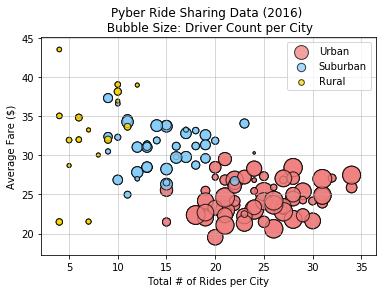

In [24]:
#Plot the Urban, Suburban and Rural data
import seaborn as sns
# Not sure why the seaborn formatting isn't coming through, based on this website:
# https://python-graph-gallery.com/271-custom-your-bubble-plot/

urban_plot = plt.scatter(x = urban['ride_count'], y = urban['fare'], s = urban['driver_count'] * 5, alpha = 0.75, 
                        edgecolors = 'black', color = 'lightcoral', label = 'Urban')

suburban_plot = plt.scatter(x = suburban['ride_count'], y = suburban['fare'], s = suburban['driver_count'] * 5, alpha = 0.75, 
                        edgecolors = 'black', color = 'lightskyblue', label = 'Suburban')

rural_plot = plt.scatter(x = rural['ride_count'], y = rural['fare'], s = rural['driver_count'] * 5, alpha = 0.75, 
                        edgecolors = 'black', color = 'gold', label = 'Rural')


#Add grid
plt.grid(linestyle='-', linewidth = 1, alpha = 0.5)

#Create a legend
plt.legend(handles = [urban_plot, suburban_plot, rural_plot], loc = 'best')

#Add Chart Title and Axis Labels
plt.title('Pyber Ride Sharing Data (2016) \n Bubble Size: Driver Count per City')
plt.xlabel('Total # of Rides per City')
plt.ylabel('Average Fare ($)')

# Show the chart
plt.show()

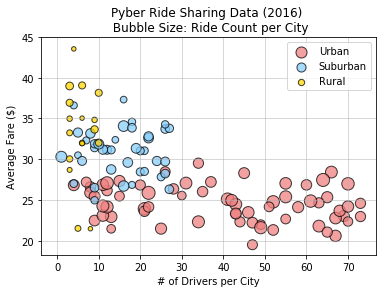

In [25]:
#Plot the Urban, Suburban and Rural data

urban_plot = plt.scatter(x = urban['driver_count'], y = urban['fare'], s = urban['ride_count'] * 5, alpha = 0.75, 
                        edgecolors = 'black', color = 'lightcoral', label = 'Urban')

suburban_plot = plt.scatter(x = suburban['driver_count'], y = suburban['fare'], s = suburban['ride_count'] * 5, alpha = 0.75, 
                        edgecolors = 'black', color = 'lightskyblue', label = 'Suburban')

rural_plot = plt.scatter(x = rural['driver_count'], y = rural['fare'], s = rural['ride_count'] * 5, alpha = 0.75, 
                        edgecolors = 'black', color = 'gold', label = 'Rural')


#Create a legend
plt.legend(handles = [urban_plot, suburban_plot, rural_plot], loc = 'best')

#Add grid
plt.grid(linestyle='-', linewidth = 1, alpha = 0.5)


#Add Chart Title and Axis Labels
plt.title('Pyber Ride Sharing Data (2016) \n Bubble Size: Ride Count per City')
plt.xlabel('# of Drivers per City')
plt.ylabel('Average Fare ($)')

# Show the chart
plt.show()

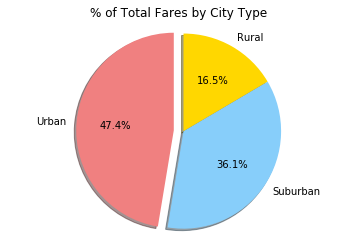

In [14]:
# Pie Charts
# % of Total Fares by City Type

urban_fare = urban['fare'].sum()
suburban_fare = suburban['fare'].sum()
rural_fare = rural['fare'].sum()

labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_fare, suburban_fare, rural_fare]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = [0.1, 0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

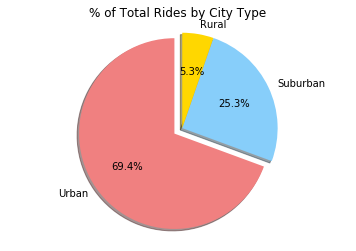

In [15]:
# Pie Charts
# % of Total Rides by City Type

urban_rides = urban['ride_count'].sum()
suburban_rides = suburban['ride_count'].sum()
rural_rides = rural['ride_count'].sum()

labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_rides, suburban_rides, rural_rides]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = [0.1, 0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

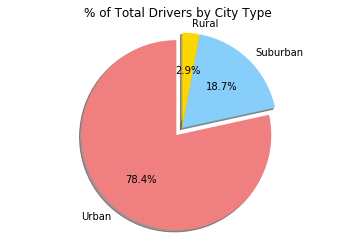

In [16]:
# Pie Charts
# % of Total Drivers by City Type

urban_drivers = urban['driver_count'].sum()
suburban_drivers = suburban['driver_count'].sum()
rural_drivers = rural['driver_count'].sum()

labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_drivers, suburban_drivers, rural_drivers]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = [0.1, 0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [17]:
##### Three observable trends #####

# 1) As expected, Urban cities have the largest percent of total rides and drivers at 69.4% and 78.4%, respectively

# 2) However, when it comes to the percent of total fares, urban rides only make up 47.4% of the total fares from 2016, 
#    indicating that their average driving distance, fare rate, etc. was less than that of Suburban / Rural cities

# 3) This could be somewhat explained by supply and demand based on the scatterplot.  The scatterplot shows that there is a
#    negative relationship between average fare and total # of rides per city.  There is also evidence of a negative 
#    relationship between average fare and total # of drivers.  Putting those thougts together, it is not surprising that
#    more drivers leads to lower fares, despite a larger 